## Question 1 : De quelles données va-t-on avoir besoin pour entraîner un modèle à coloriser des images en noir et blanc ? Si un tel jeu de données n’existe pas, peut-on le créer aisément ?

Pour entraîner un modèle de deep learning à coloriser des images en noir et blanc, un jeu de données d'images en couleur est indispensable. Chaque image couleur peut être convertie en version noir et blanc pour servir d'entrée au modèle, tandis que l'image couleur d'origine sera utilisée comme jeu de validation pour l'apprentissage supervisé.

Si un jeu de données dédié à la colorisation n'existe pas, il est tout à fait possible de le créer. Il suffit de prendre un jeu de données d'images en couleur déjà disponible (comme CelebA, ImageNet, etc.) et de convertir ces images en noir et blanc. Cette conversion peut se faire facilement en extrayant le canal de luminance dans un espace de couleur tel que CIELab ou en calculant une moyenne pondérée des canaux RGB. Cela permettra de générer les paires d'images nécessaires à l'entraînement du modèle.

## Question 2 : À quoi correspondent les trois canaux L, a et b de l’espace de couleur CIELab ?

Dans l'espace de couleur CIELab, les trois canaux représentent :

- **L (Luminance)** : Ce canal représente la luminosité de l'image, c'est-à-dire la quantité de lumière perçue par l'œil humain. Il varie généralement de 0 (noir) à 100 (blanc).

- **a (vert-rouge)** : Ce canal représente la dimension de couleur allant du vert au rouge. Les valeurs négatives de ce canal indiquent une teinte plus verte, tandis que les valeurs positives indiquent une teinte plus rouge.

- **b (bleu-jaune)** : Ce canal représente la dimension de couleur allant du bleu au jaune. Les valeurs négatives de ce canal indiquent une teinte plus bleue, tandis que les valeurs positives indiquent une teinte plus jaune.

Cet espace de couleur est particulièrement avantageux en traitement d'image car il dissocie l'information de luminance (L) des informations de chrominance (a et b), permettant ainsi de traiter la couleur de manière indépendante de la luminosité.


## Question 3 : Quel va être l’intérêt de l’espace de couleur CIELab par rapport au RGB pour notre problème ?


L'intérêt majeur de l'espace de couleur CIELab par rapport au RGB dans la colorisation d'images en noir et blanc réside dans la séparation de la luminance (L) des informations chromatiques (a et b). Contrairement à l'espace RGB, où les informations de couleur et de luminosité sont entremêlées, l'espace CIELab permet de traiter la couleur indépendamment de la luminosité. Cela simplifie l'apprentissage pour un modèle de deep learning, qui peut ainsi se concentrer sur la prédiction des canaux a et b (chrominance) tout en utilisant le canal L pour conserver la structure de l'image. De plus, l'espace CIELab est perceptuellement uniforme, ce qui signifie que les différences de couleur dans cet espace reflètent davantage la perception humaine, rendant les résultats plus réalistes.



## Question 4 : Notre modèle sera une fonction f(x)=y. À quoi correspondront x et y ? En d'autres termes, quel sera l'entrée de notre modèle et quelle sera sa sortie ?


Dans le cadre de ce projet de colorisation d'images, la fonction 𝑓(𝑥)=𝑦 représente le modèle de deep learning que nous allons entraîner.

Ici, 𝑥 correspond à l'image en noir et blanc, c'est-à-dire au canal L de l'espace CIELab, avec une dimension de 128×128×1. Cette dimension indique que l'image est constituée de 128 par 128 pixels, avec une seule couche représentant la luminance.

En revanche, 𝑦 représente les canaux de chrominance (a et b) de l'espace CIELab, avec une dimension de 128×128×2. Cela signifie que la sortie du modèle sera une image de 128 par 128 pixels, composée de deux couches, correspondant aux informations de couleur allant du vert au rouge (canal a) et du bleu au jaune (canal b).


## Question 5 : Le problème que nous cherchons à résoudre est-il un problème de classification ou de régression ? Justifiez.

Le problème que nous cherchons à résoudre dans ce projet de colorisation d'images en noir et blanc est un problème de régression. Le modèle doit en effet prédire les valeurs continues des canaux 𝑎 et 𝑏 de l'espace de couleur CIELab pour chaque pixel de l'image. Ces valeurs ne sont pas des catégories discrètes, mais des valeurs continues représentant les coordonnées de couleur dans l'espace CIELab. Le modèle doit donc apprendre à associer à chaque pixel en niveaux de gris (canal 𝐿) les bonnes valeurs de chrominance (canaux 𝑎 et 𝑏) afin de recréer fidèlement la couleur d'origine. Ce processus, qui consiste à prédire des valeurs continues, est typique des problèmes de régression.



## Question 6 : Comment évaluer la performance de notre modèle ?

Pour évaluer la performance de notre modèle de colorisation, plusieurs approches peuvent être utilisées :

- **Comparaison des couleurs** : On peut mesurer l'écart entre les couleurs prédites par le modèle et les couleurs réelles, généralement à l'aide de métriques comme la différence moyenne quadratique (MSE) dans l'espace CIELab. Un écart plus faible indique un modèle plus performant.

- **Observation visuelle** : En observant les images colorisées, on peut juger de leur réalisme. Si les couleurs paraissent naturelles et esthétiques, cela signifie que le modèle fonctionne correctement.

- **Utilisation d'outils avancés** : Pour des évaluations plus sophistiquées, on peut recourir à des techniques comme les réseaux adverses génératifs (GANs), qui permettent de vérifier automatiquement si les images générées par le modèle sont visuellement proches de vraies photos en couleur.

Ces méthodes combinées nous permettent d'évaluer si le modèle colorise les images de manière fidèle, tant en termes de précision numérique que de perception visuelle.

## Question 7 Que contient précisément le jeu de données CelebA ?

Le jeu de données CelebA (CelebFaces Attributes Dataset) est une vaste collection d'images faciales de célébrités. Voici ce qu'il contient précisément :

- Images : Le jeu de données comprend environ 200 000 images de visages de célébrités. Ces images sont variées en termes de pose, d'expression faciale et de conditions d'éclairage.

- Attributs : Pour chaque image, 40 attributs binaires sont annotés. Ces attributs décrivent des caractéristiques spécifiques des visages, telles que le sexe, la couleur des cheveux, la présence de lunettes, la forme du visage, le sourire, etc.

- Bouding boxes : Le jeu de données inclut également des bounding boxes (boîtes délimitant les visages) pour faciliter les tâches de détection de visage.

- Landmarks faciaux : Cinq points de repère (landmarks) sont fournis pour chaque image, indiquant la position des yeux, du nez, et des coins de la bouche. Ces informations sont utiles pour l'alignement et l'analyse détaillée des visages.

**Étape 2 : Créer des objets Dataset pour l’entraînement et la validation**


In [1]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset, validation_dataset = image_dataset_from_directory(
    'my_celebs',  
    image_size=(128, 128),
    batch_size=32,
    label_mode=None,  
    validation_split=0.2,
    subset="both",
    seed=123
)

Found 33062 files belonging to 1 classes.
Using 26450 files for training.
Using 6612 files for validation.


In [2]:
# import tensorflow as tf
# from tensorflow.keras.utils import image_dataset_from_directory # type: ignore

# train_dataset = image_dataset_from_directory(
#     'my_celebs',  
#     image_size=(128, 128),
#     batch_size=32,
#     label_mode=None,  
#     validation_split=0.2,
#     subset="training",
#     seed=123
# )

# validation_dataset = image_dataset_from_directory(
#     'my_celebs',  
#     image_size=(128, 128),
#     batch_size=32,
#     label_mode=None,
#     validation_split=0.2,
#     subset="validation",
#     seed=123
# )


In [3]:
# Vérification 
print("Nombre de lots d'entraînement :", len(train_dataset))
print("Nombre de lots de validation :", len(validation_dataset))

for images in train_dataset.take(1): 
    print("Dimensions des images dans le lot :", images.shape)  
    print("Type des données :", type(images)) 


Nombre de lots d'entraînement : 827
Nombre de lots de validation : 207
Dimensions des images dans le lot : (32, 128, 128, 3)
Type des données : <class 'tensorflow.python.framework.ops.EagerTensor'>


**Étape 3 : Afficher une image du jeu d’entraînement**


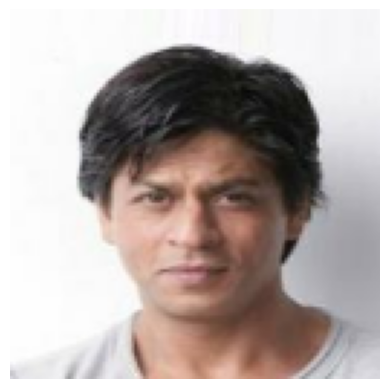

In [4]:
import matplotlib.pyplot as plt

train_images = next(iter(train_dataset))

first_image = train_images[0].numpy().astype("uint8")

plt.imshow(first_image)
plt.axis("off")
plt.show()


**Étape 4 : Préparer les jeux de données pour les dimensions 128 × 128 et le format CIELab**

Étape 4.1 : Redimensionner les images à 128 × 128


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Resizing  # type: ignore

def resize_image(image):
    resizer = Resizing(128, 128)
    return resizer(image)

train_dataset_resized = train_dataset.map(lambda x: resize_image(x))

validation_dataset_resized = validation_dataset.map(lambda x: resize_image(x))


In [6]:
# Vérification
resized_image = next(iter(train_dataset_resized))

print("Dimensions de l'image après redimensionnement :", resized_image.shape)


Dimensions de l'image après redimensionnement : (32, 128, 128, 3)


Étape 4.2 : Conversion des images au format CIELab


In [7]:
from skimage.color import rgb2lab
import numpy as np

def rgb_to_lab(image):
    image = image.numpy() / 255.0  
    lab_image = rgb2lab(image)
    return lab_image.astype(np.float32)

def batch_rgb_to_lab(batch):
    lab_batch = [rgb_to_lab(image) for image in batch]
    return np.stack(lab_batch)

def map_rgb_to_lab(batch):
    lab_batch = tf.py_function(func=batch_rgb_to_lab, inp=[batch], Tout=tf.float32)
    lab_batch = tf.ensure_shape(lab_batch, shape=(None, 128, 128, 3))
    return lab_batch

train_dataset_lab = train_dataset_resized.map(map_rgb_to_lab)
validation_dataset_lab = validation_dataset_resized.map(map_rgb_to_lab)


Valeurs de l'image après conversion au format CIELab : tf.Tensor(
[[[ 3.0189259e+01 -1.8316105e+01  3.8740814e+00]
  [ 3.0391415e+01 -1.7131105e+01  3.3903599e+00]
  [ 3.0829868e+01 -1.5071541e+01  2.7166367e+00]
  ...
  [ 2.7417374e-01 -1.4901161e-05  3.2782555e-05]
  [ 2.7417374e-01 -1.4901161e-05  3.2782555e-05]
  [ 2.7417374e-01 -1.4901161e-05  3.2782555e-05]]

 [[ 3.0189259e+01 -1.8316105e+01  3.8740814e+00]
  [ 3.0391415e+01 -1.7131105e+01  3.3903599e+00]
  [ 3.0829868e+01 -1.5071541e+01  2.7166367e+00]
  ...
  [ 2.7417374e-01 -1.4901161e-05  3.2782555e-05]
  [ 2.7417374e-01 -1.4901161e-05  3.2782555e-05]
  [ 2.7417374e-01 -1.4901161e-05  3.2782555e-05]]

 [[ 3.0189259e+01 -1.8316105e+01  3.8740814e+00]
  [ 3.0391415e+01 -1.7131105e+01  3.3903599e+00]
  [ 3.0829868e+01 -1.5071541e+01  2.7166367e+00]
  ...
  [ 2.7417374e-01 -1.4901161e-05  3.2782555e-05]
  [ 2.7417374e-01 -1.4901161e-05  3.2782555e-05]
  [ 2.7417374e-01 -1.4901161e-05  3.2782555e-05]]

 ...

 [[ 2.5211105e+00 -1.6

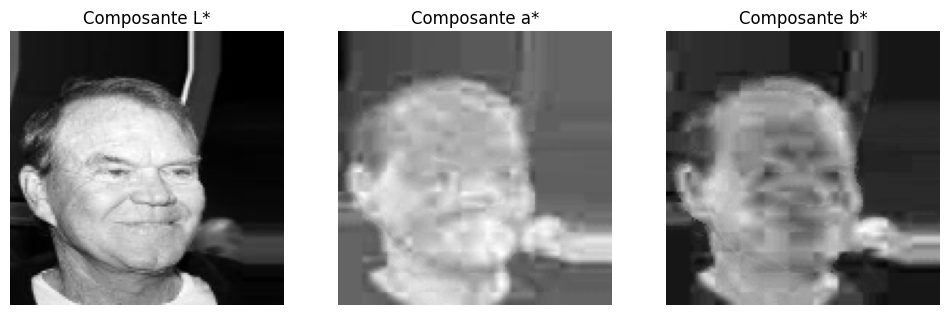

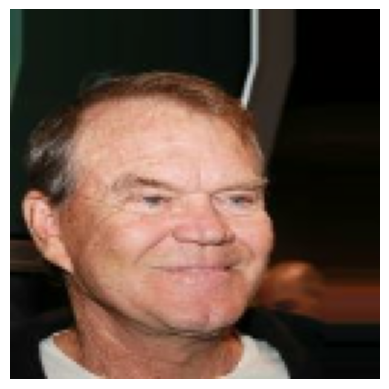

In [8]:
# Vérification
lab_image = next(iter(train_dataset_lab))

print("Valeurs de l'image après conversion au format CIELab :", lab_image[0])

import matplotlib.pyplot as plt

L = lab_image[0, :, :, 0]  
a = lab_image[0, :, :, 1]  
b = lab_image[0, :, :, 2]  

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(L, cmap='gray')
plt.title('Composante L*')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(a, cmap='gray')
plt.title('Composante a*')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(b, cmap='gray')
plt.title('Composante b*')
plt.axis("off")

plt.show()

from skimage.color import lab2rgb

# RGB
rgb_image = lab2rgb(lab_image[0].numpy())
plt.imshow(rgb_image)
plt.axis("off")
plt.show()


**Étape 5 : Transformer les jeux de données en paires (x, y)**

In [9]:
def split_into_x_y(lab_image):
    L = lab_image[:, :, 0]
    ab = lab_image[:, :, 1:]
    
    L = tf.expand_dims(L, axis=-1)
    
    return L, ab

train_dataset_xy = train_dataset_lab.map(lambda x: tf.map_fn(split_into_x_y, x, dtype=(tf.float32, tf.float32)))
validation_dataset_xy = validation_dataset_lab.map(lambda x: tf.map_fn(split_into_x_y, x, dtype=(tf.float32, tf.float32)))


Instructions for updating:
Use fn_output_signature instead


In [10]:
# Vérification
x, y = next(iter(train_dataset_xy))

print("Forme de x (canal L*):", x.shape)
print("Forme de y (canaux a* et b*):", y.shape)


Forme de x (canal L*): (32, 128, 128, 1)
Forme de y (canaux a* et b*): (32, 128, 128, 2)


**Étape 6 : Écrire la fonction reconstituer_image(x, y)**

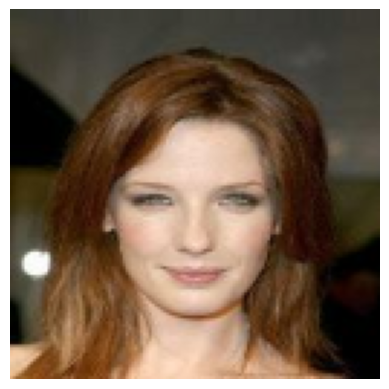

In [11]:
from skimage.color import lab2rgb

def reconstituer_image(x, y):
    lab_image = np.concatenate([x, y], axis=-1)
    
    rgb_image = lab2rgb(lab_image)
    
    return rgb_image

x, y = next(iter(train_dataset_xy))
rgb_image = reconstituer_image(x[0].numpy(), y[0].numpy())

plt.imshow(rgb_image)
plt.axis("off")
plt.show()


## Question 8 – Quelles seront les dimensions de la couche d’entrée de notre réseau ? De sa couche de sortie ?

#### **Dimensions de la couche d'entrée :**

1. **Format des images d'entrée :**
   - Les images à traiter sont redimensionnées à **128x128 pixels**.
   - Elles sont converties au format **CIELab**.
   - Seul le canal **L\*** est utilisé comme entrée dans le réseau.

2. **Nombre de canaux :**
   - Le canal L\* étant unique, l'entrée comporte **1 canal**.

3. **Dimension de l'entrée :**
   - Chaque image d'entrée est de forme **(128, 128, 1)**.

#### **Dimensions de la couche de sortie :**

1. **Sortie du réseau :**
   - Le réseau a pour objectif de prédire les canaux a\* et b\* de chaque image.
   - Ainsi, pour chaque pixel, deux valeurs sont prédites : une pour le canal a\* et une autre pour le canal b\*.

2. **Nombre de canaux :**
   - La sortie comporte **2 canaux** (a\* et b\*).

3. **Dimension de la sortie :**
   - L'image de sortie ayant la même résolution que celle d'entrée, la sortie est de forme **(128, 128, 2)**.

#### **Résumé :**

- **Couche d'entrée :** `(128, 128, 1)` — Correspond aux images d'entrée en niveaux de gris (canal L\* uniquement).
- **Couche de sortie :** `(128, 128, 2)` — Représente les canaux a\* et b\* prédits, qui serviront à reconstituer l'image en couleur.

Cette architecture permet de transformer une image en niveaux de gris (L\*) en une image colorisée en prédisant les composantes a\* et b\* nécessaires.


## Question 9 – Quel est l’intérêt d’une couche convolutive par rapport à une couche complètement connectée ?​

#### **Couche Convolutive vs Couche Complètement Connectée :**

- **Conservation de l'information spatiale :**
  - Les couches convolutives sont idéales pour capturer des motifs locaux tels que les bords ou les textures, car elles maintiennent les relations spatiales entre les pixels, ce qui est essentiel pour le traitement d'images.
  - En revanche, les couches complètement connectées traitent l'image dans sa globalité, ce qui entraîne une perte de ces informations spatiales cruciales.

- **Réduction du nombre de paramètres :**
  - Les couches convolutives nécessitent moins de paramètres, car chaque filtre est appliqué à toute l'image, minimisant ainsi le risque de surapprentissage (overfitting).
  - Les couches complètement connectées, quant à elles, ont un nombre beaucoup plus élevé de paramètres, puisque chaque neurone est connecté à tous les pixels de la couche précédente.

- **Invariance de translation :**
  - Les couches convolutives sont capables de détecter des motifs partout dans l'image, offrant ainsi une robustesse face aux déplacements d'objets.
  - Les couches complètement connectées n'ont pas cette capacité, ce qui rend le modèle moins performant pour les tâches de traitement d'images.

**En résumé :** Les couches convolutives sont plus appropriées pour le traitement d'images car elles préservent les relations spatiales, nécessitent moins de paramètres, et sont robustes aux déplacements au sein de l'image.


## Question 10 – Comment peut-on interpréter l’ « image » en sortie d’une convolution ?

### **Interprétation de l'image en sortie d'une convolution :**

- **Cartes de caractéristiques :** La sortie de la convolution se compose de plusieurs cartes de caractéristiques (*feature maps*), chacune mettant en évidence des motifs spécifiques, tels que des bords ou des textures, détectés par les filtres convolutifs.
- **Abstraction :** Les premières couches de la convolution captent des motifs simples, tandis que les couches plus profondes identifient des structures plus complexes.
- **Dimensions :** La sortie présente des dimensions réduites par rapport à l'image d'origine, et le nombre de cartes de caractéristiques correspond au nombre de filtres utilisés.

**En résumé :** La sortie d'une convolution est une représentation abstraite de l'image, soulignant les motifs essentiels détectés.


## Question 11 – Si un filtre convolutif de taille 3 × 3 est appliqué sans padding et avec un pas de 1 à une image de dimensions 128 × 128, quelle est la dimension de l’image de sortie ? Et avec un filtre de taille 5 × 5 ?​

#### **Calcul des dimensions de sortie :**

1. **Filtre 3 × 3 :**
   - Image d'origine : \( 128 \times 128 \)
   - Dimension de sortie : \( 126 \times 126 \)

2. **Filtre 5 × 5 :**
   - Image d'origine : \( 128 \times 128 \)
   - Dimension de sortie : \( 124 \times 124 \)

**Formule utilisée :** \(\text{Dimension de sortie} = (W - F + 1) \times (H - F + 1)\)

En résumé, la taille de l'image se réduit en fonction de la taille du filtre utilisé.


## Question 12 – Un réseau convolutif vous paraît-il approprié pour notre tâche ? Pourquoi ?

### **Pourquoi un réseau convolutif est idéal pour la colorisation d'images :**

1. **Capture des motifs locaux :** Les CNNs détectent des motifs tels que les bords et les textures, indispensables pour déterminer les couleurs appropriées dans une image.
  
2. **Invariance de translation :** Ils identifient les objets, quelle que soit leur position dans l'image, garantissant ainsi une colorisation uniforme.

3. **Efficacité :** Avec moins de paramètres qu'un réseau entièrement connecté, les CNNs sont plus efficaces et réduisent le risque de surapprentissage.

4. **Représentation hiérarchique :** Les CNNs développent des représentations de plus en plus sophistiquées, essentielles pour une colorisation réaliste.

**Conclusion :** un réseau convolutif est très approprié pour la tâche de colorisation d'images, car il est capable de comprendre les structures d'une image à différents niveaux de détail, ce qui est crucial pour appliquer des couleurs réalistes.


## Question 13 – Quelles sont les plages de valeurs possibles pour les canaux 𝑎 et 𝑏 d’une image au format Lab ? En prenant en compte cette plage, quelle fonction d’activation choisiriez-vous pour la sortie de votre réseau de neurones ?

#### **Plages de valeurs des canaux a et b dans le format Lab :**

- **Canal a\*** : Les valeurs de ce canal varient généralement entre **-128 et 127**. Ce canal indique la position de la couleur entre le vert (-128) et le rouge (127).
- **Canal b\*** : De la même manière, les valeurs de ce canal oscillent entre **-128 et 127**, mesurant la position de la couleur entre le bleu (-128) et le jaune (127).

### **Choix de la fonction d'activation :**

- **Tanh** : Cette fonction d'activation est couramment utilisée pour la sortie d'un réseau de neurones lorsque les valeurs prédites sont centrées autour de zéro et présentent une symétrie, comme c'est le cas ici. La fonction Tanh génère des valeurs dans l'intervalle \([-1, 1]\), ce qui correspond bien aux plages de valeurs réduites des canaux a\* et b\*.
  
  Pour ajuster la sortie du réseau aux plages exactes de \([-128, 127]\), il suffit de multiplier les sorties de Tanh par un facteur de 128.

### **Conclusion :**

- Les canaux a\* et b\* du format Lab ont des valeurs comprises entre \(-128\) et \(127\).
- La fonction d'activation **Tanh** est bien adaptée pour modéliser ces valeurs, avec une mise à l'échelle pour correspondre aux plages spécifiques.


**13.1 À l’aide de keras.Sequential, créez un modèle dont l’architecture est celle de la figure 2.**

In [12]:
from tensorflow.keras import layers, models # type: ignore

model = models.Sequential()

hauteur_image = 128
largeur_image = 128


**13.2 Rescaling**

In [13]:
model.add(layers.Rescaling(1./50, offset=-1, input_shape=(hauteur_image, largeur_image, 1)))


**13.3 Couches Conv2D et Conv2DTranspose**

In [14]:
filters = [64, 128, 256, 512]

for f in filters:
    model.add(layers.Conv2D(f, (3, 3), strides=2, padding='same', activation='relu'))

for f in reversed(filters[:-1]):
    model.add(layers.Conv2DTranspose(f, (3, 3), strides=2, padding='same', activation='relu'))

model.add(layers.Conv2DTranspose(2, (3, 3), strides=2, padding='same', activation='tanh'))


**13.3 Dernière couche de Rescaling**

In [15]:
model.add(layers.Rescaling(128, offset=0)) 


**13.4 Compilation**

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')


**13.5 Entraînement**

In [17]:

history = model.fit(train_dataset_xy, epochs=10, validation_data=validation_dataset_xy)


Epoch 1/10
827/827 [==============================] - 326s 393ms/step - loss: 130.3637 - val_loss: 124.9773
Epoch 2/10
827/827 [==============================] - 325s 393ms/step - loss: 121.5117 - val_loss: 120.3096
Epoch 3/10
827/827 [==============================] - 307s 371ms/step - loss: 118.3792 - val_loss: 118.7019
Epoch 4/10
827/827 [==============================] - 317s 383ms/step - loss: 116.4848 - val_loss: 117.9298
Epoch 5/10
827/827 [==============================] - 487s 588ms/step - loss: 114.8340 - val_loss: 118.2626
Epoch 6/10
827/827 [==============================] - 628s 760ms/step - loss: 112.5974 - val_loss: 118.9593
Epoch 7/10
827/827 [==============================] - 1967s 2s/step - loss: 109.7439 - val_loss: 120.2652
Epoch 8/10
827/827 [==============================] - 300s 362ms/step - loss: 105.9464 - val_loss: 121.8698
Epoch 9/10
827/827 [==============================] - 541s 654ms/step - loss: 101.3261 - val_loss: 126.2921
Epoch 10/10
827/827 [=========

## Question 14 – Qu’observe-t-on lorsqu’on compare la perte sur le jeu d’entraînement avec la perte sur le jeu de validation au cours de l’entraînement ? Comment s’appelle ce phénomène ? Que pourrait-on faire pour l’éviter ?

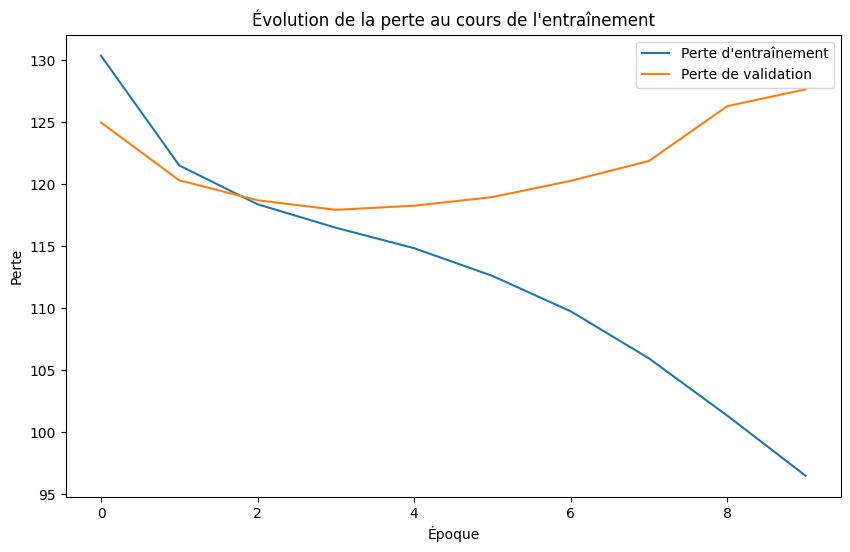

In [18]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Perte d\'entraînement')
plt.plot(val_loss, label='Perte de validation')
plt.title('Évolution de la perte au cours de l\'entraînement')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.show()



**Observation :**  
Lors de l'entraînement du modèle, on observe souvent que la perte sur le jeu d'entraînement continue de diminuer de manière régulière au fil des époques. Cependant, la perte sur le jeu de validation peut commencer à stagner ou même à augmenter après un certain point, alors que la perte d'entraînement continue de baisser. Ce phénomène indique que le modèle commence à **surapprendre** ou à **surajuster** aux données d'entraînement.

**Nom du phénomène :**  
Ce phénomène est connu sous le nom de **surapprentissage** ou **overfitting**. L'overfitting se produit lorsque le modèle devient trop spécifique aux données d'entraînement, capturant le bruit ou les détails non pertinents, ce qui réduit sa capacité à généraliser à de nouvelles données.

**Moyens d'éviter l'overfitting :**

1. **Régularisation L2 :**  
   Ajouter une régularisation L2 (ou ridge) aux couches du modèle permet de pénaliser les poids avec des valeurs trop élevées, ce qui aide à éviter un ajustement excessif.

2. **Dropout :**  
   Utiliser le Dropout consiste à désactiver de manière aléatoire une proportion de neurones durant l'entraînement, ce qui force le modèle à ne pas trop dépendre de certains neurones spécifiques.

3. **Augmentation des données :**  
   Appliquer des transformations comme des rotations, des recadrages ou des modifications de luminosité sur les données d'entraînement permet d'augmenter la diversité du jeu de données et améliore la robustesse du modèle.

4. **Utilisation d'un modèle plus simple :**  
   Réduire la complexité du modèle, par exemple en diminuant le nombre de couches ou de neurones, peut aider à éviter que le modèle ne surapprenne.

5. **Arrêt anticipé (Early Stopping) :**  
   L'arrêt anticipé interrompt l'entraînement du modèle dès que la perte de validation commence à augmenter, permettant ainsi de conserver les poids du modèle au moment où il généralisait le mieux.



**14.1 Écrivez une fonction coloriser(im)**

In [19]:
from skimage.color import lab2rgb


def coloriser(im):
    if len(im.shape) == 2:  
        im = np.expand_dims(im, axis=-1)  
    
    L = tf.image.resize(im, (128, 128))
    L = tf.expand_dims(L, axis=0) 
    
    ab_pred = model.predict(L)
    
    lab_image = np.concatenate((L[0], ab_pred[0]), axis=-1)
    
    rgb_image = lab2rgb(lab_image)
    
    rgb_image = tf.image.resize(rgb_image, (im.shape[0], im.shape[1]))
    
    return rgb_image



**14.2 Affichez (sur une seule figure) cinq images**

1/1 [==============================] - 0s 131ms/step


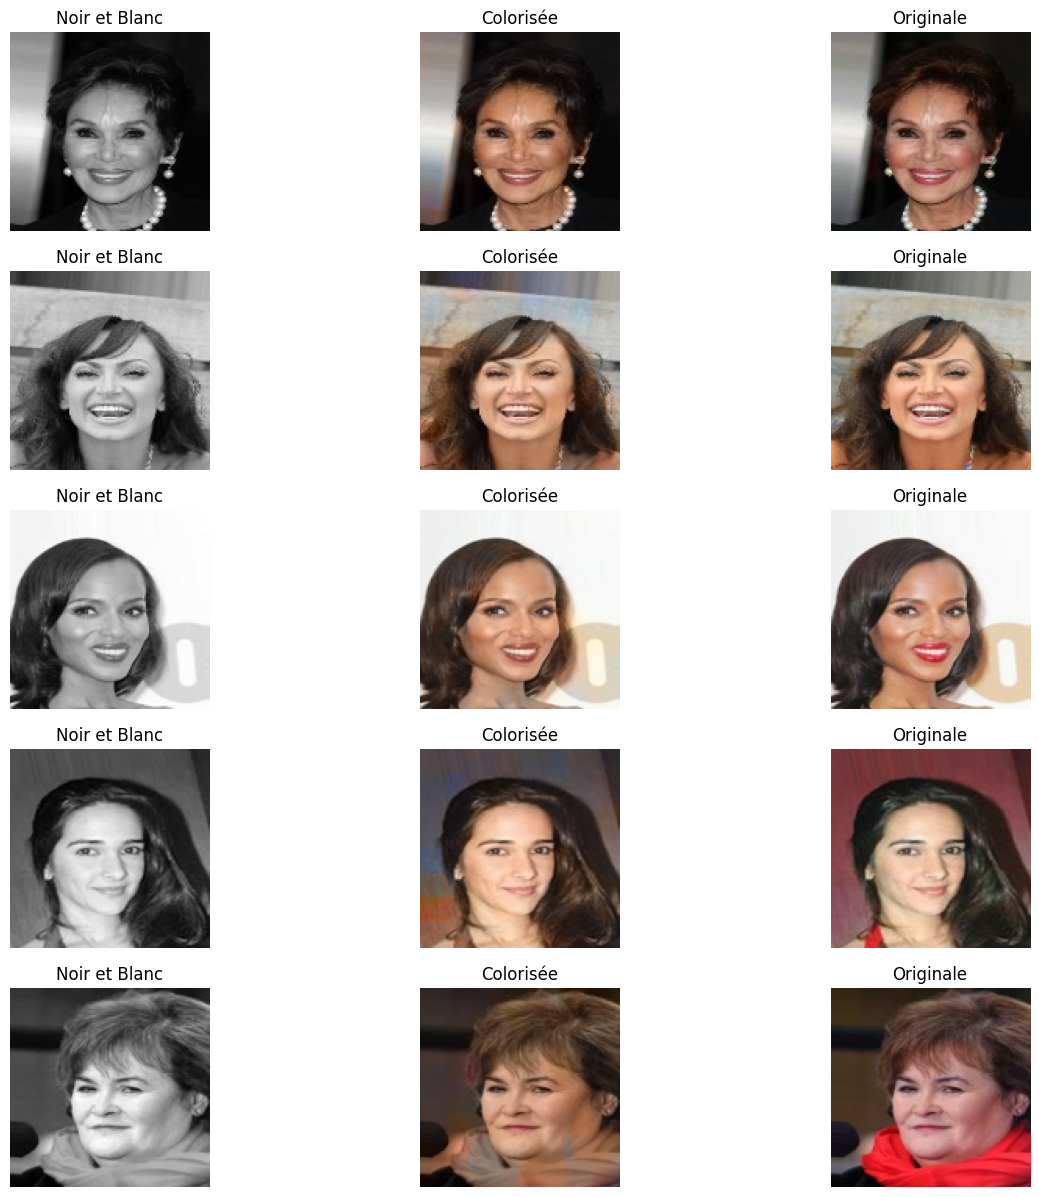

In [20]:

def afficher_comparaison(dataset):
    samples = dataset.take(5)
    
    plt.figure(figsize=(15, 15))
    
    for i, (L, ab) in enumerate(samples):
        plt.subplot(5, 3, i*3 + 1)
        plt.imshow(L[0, :, :, 0], cmap='gray')
        plt.axis('off')
        plt.title('Noir et Blanc')
        
        # Afficher l'image colorisée par le modèle
        plt.subplot(5, 3, i*3 + 2)
        pred_ab = model.predict(L)
        reconstituted_img = np.concatenate((L[0], pred_ab[0]), axis=-1)
        plt.imshow(lab2rgb(reconstituted_img))
        plt.axis('off')
        plt.title('Colorisée')
        
        # Afficher l'image originale (référence)
        plt.subplot(5, 3, i*3 + 3)
        original_img = np.concatenate((L[0], ab[0]), axis=-1)
        plt.imshow(lab2rgb(original_img))
        plt.axis('off')
        plt.title('Originale')
    
    plt.show()

afficher_comparaison(validation_dataset_xy)


**14.3 Testez votre modèle sur cinq portraits tirés d’internet**

Chargement de l'image : internet/image1.jpeg
Dimensions de l'image chargée : (194, 259, 3)
L'image est en couleur, convertie en niveaux de gris : (194, 259)
Ajout d'une dimension de canal : (194, 259, 1)
1/1 [==============================] - 0s 52ms/step
Image colorisée générée, dimensions : (194, 259, 3)
Chargement de l'image : internet/image2.jpeg
Dimensions de l'image chargée : (164, 307, 3)
L'image est en couleur, convertie en niveaux de gris : (164, 307)
Ajout d'une dimension de canal : (164, 307, 1)
1/1 [==============================] - 0s 14ms/step
Image colorisée générée, dimensions : (164, 307, 3)
Chargement de l'image : internet/image3.jpeg
Dimensions de l'image chargée : (225, 225, 3)
L'image est en couleur, convertie en niveaux de gris : (225, 225)
Ajout d'une dimension de canal : (225, 225, 1)
1/1 [==============================] - 0s 13ms/step
Image colorisée générée, dimensions : (225, 225, 3)
Chargement de l'image : internet/image4.jpeg
Dimensions de l'image chargée :

/var/folders/1m/_vrb71512zv9d4v43d9hh8pr0000gn/T/ipykernel_5479/3280547156.py:16: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 1 negative Z values that have been clipped to zero
  rgb_image = lab2rgb(lab_image)


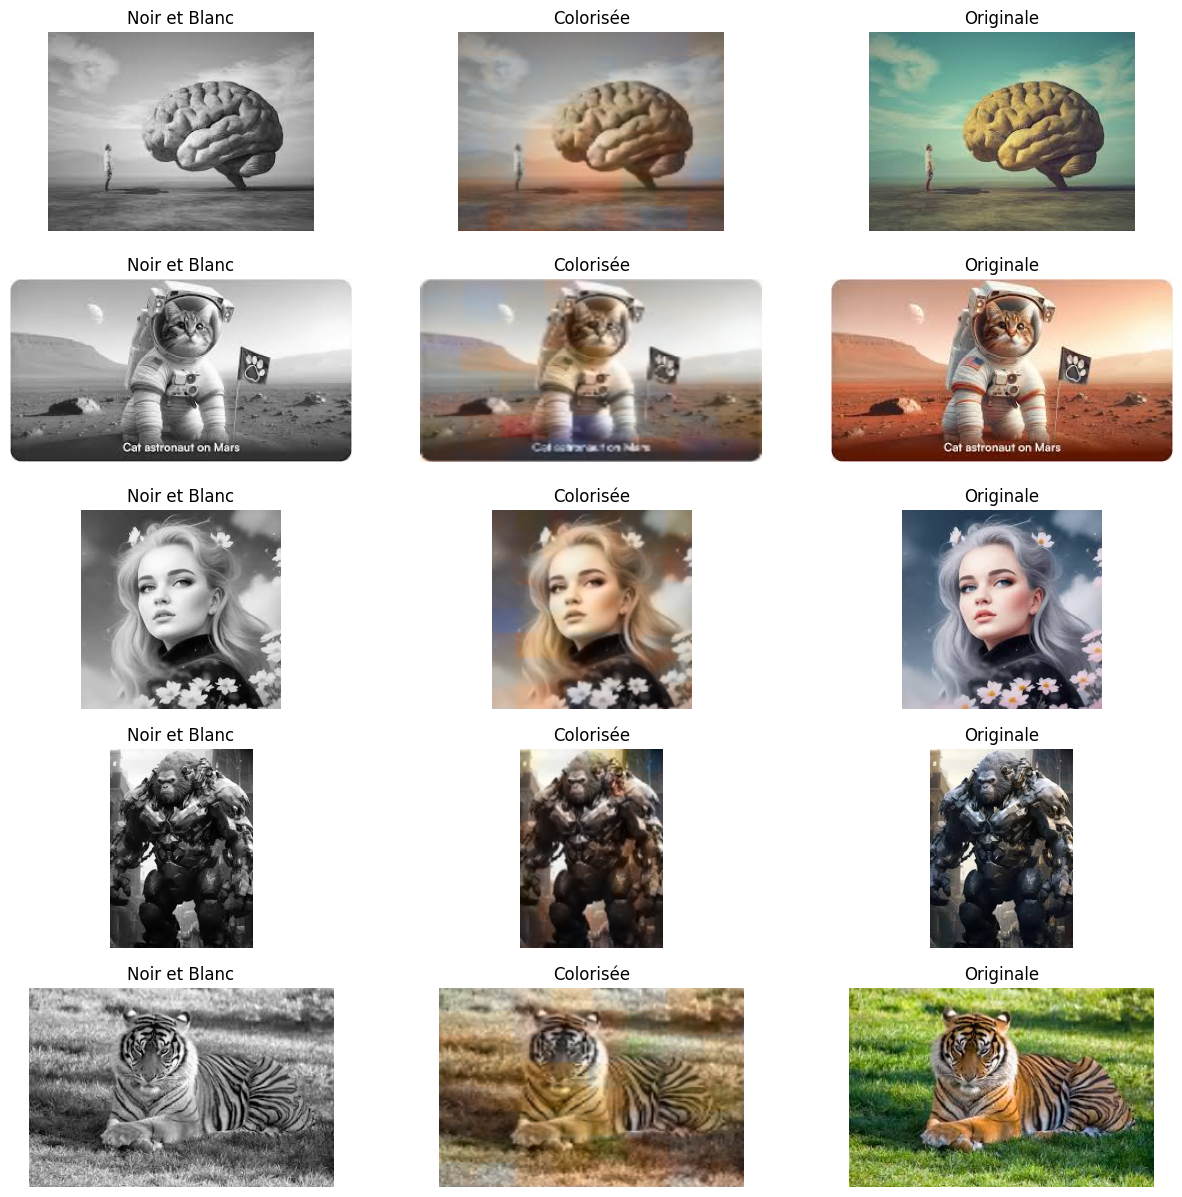

In [21]:
from skimage.io import imread
from skimage.color import rgb2lab

def tester_model_sur_images(images):
    plt.figure(figsize=(15, 15))
    
    for i, image_path in enumerate(images):
        image = imread(image_path)
        print(f"Chargement de l'image : {image_path}")
        print(f"Dimensions de l'image chargée : {image.shape}")
        
        if len(image.shape) == 3 and image.shape[-1] == 3:
            image_bw = rgb2lab(image)[:, :, 0]
            print(f"L'image est en couleur, convertie en niveaux de gris : {image_bw.shape}")
        elif len(image.shape) == 2 or (len(image.shape) == 3 and image.shape[-1] == 1):
            image_bw = image
            print(f"L'image est déjà en niveaux de gris : {image_bw.shape}")
        
        if len(image_bw.shape) == 2:
            image_bw = np.expand_dims(image_bw, axis=-1)
            print(f"Ajout d'une dimension de canal : {image_bw.shape}")
        colorised_image = coloriser(image_bw)
        print(f"Image colorisée générée, dimensions : {colorised_image.shape}")
        
        plt.subplot(5, 3, i*3 + 1)
        plt.imshow(image_bw[:, :, 0], cmap='gray')
        plt.axis('off')
        plt.title('Noir et Blanc')
        
        plt.subplot(5, 3, i*3 + 2)
        plt.imshow(colorised_image)
        plt.axis('off')
        plt.title('Colorisée')
        
        if len(image.shape) == 3 and image.shape[-1] == 3:
            plt.subplot(5, 3, i*3 + 3)
            plt.imshow(image)
            plt.axis('off')
            plt.title('Originale')
    
    plt.show()


image_paths = ['internet/image1.jpeg', 'internet/image2.jpeg', 'internet/image3.jpeg', 'internet/image4.jpeg', 'internet/image5.jpeg']
tester_model_sur_images(image_paths)


## Question 15 – Le modèle est beaucoup moins bon avec des photos tirées d’internet. Pourquoi d’après vous ?

### Réponse à la question 15

Le modèle est moins performant sur des photos provenant d'internet en raison des différences de distribution des données. Les images en ligne peuvent présenter des caractéristiques distinctes (résolution, éclairage, contenu) par rapport à celles utilisées lors de l'entraînement, ce qui limite la capacité du modèle à généraliser.

De plus, si le modèle a été surajusté aux données d'entraînement (overfitting), il peut avoir du mal à coloriser efficacement des images qui diffèrent de celles qu'il a apprises. Les variations dans le pré-traitement ou la qualité des images d'internet par rapport aux données d'entraînement peuvent également expliquer cette baisse de performance.

Pour améliorer les résultats, il serait judicieux d'entraîner le modèle sur un jeu de données plus diversifié et représentatif des images trouvées en ligne.




**15.1 Modifiez les jeu de données d’entraînement avec Dataset.map afin de lui appliquer des translations aléatoires dans l’intervalle ±20% (avec RandomTranslation).**

In [22]:
from tensorflow.keras.layers import RandomTranslation # type: ignore

translation_layer = RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode='reflect')

def augment_data(image, label):
    image = translation_layer(image)
    return image, label

train_dataset_augmented = train_dataset_xy.map(augment_data)


**15.2 Entraînez votre modèle sur lenouveau jeu d’entraînement puis évaluez-le à nouveau sur des images tirées du jeu de validation ainsi que sur des images tirées d’internet.**

In [23]:

history = model.fit(train_dataset_augmented, epochs=10, validation_data=validation_dataset_xy)


Epoch 1/10
827/827 [==============================] - 370s 447ms/step - loss: 142.0160 - val_loss: 130.6323
Epoch 2/10
827/827 [==============================] - 307s 372ms/step - loss: 140.2866 - val_loss: 131.8962
Epoch 3/10
827/827 [==============================] - 1037s 1s/step - loss: 139.8797 - val_loss: 130.2836
Epoch 4/10
827/827 [==============================] - 1300s 2s/step - loss: 139.6512 - val_loss: 131.3926
Epoch 5/10
827/827 [==============================] - 3752s 5s/step - loss: 139.1867 - val_loss: 130.3847
Epoch 6/10
827/827 [==============================] - 315s 380ms/step - loss: 139.0847 - val_loss: 132.9072
Epoch 7/10
827/827 [==============================] - 2265s 3s/step - loss: 138.6868 - val_loss: 132.2780
Epoch 8/10
827/827 [==============================] - 309s 374ms/step - loss: 138.8178 - val_loss: 130.6389
Epoch 9/10
827/827 [==============================] - 312s 377ms/step - loss: 138.5916 - val_loss: 132.0088
Epoch 10/10
827/827 [===============

In [24]:
# Évaluation sur le jeu de validation
val_loss = model.evaluate(validation_dataset_xy)
print(f'Perte sur le jeu de validation : {val_loss}')

207/207 [==============================] - 27s 131ms/step - loss: 131.8852
Perte sur le jeu de validation : 131.88519287109375


Chargement de l'image : internet/image1.jpeg
Dimensions de l'image chargée : (194, 259, 3)
L'image est en couleur, convertie en niveaux de gris : (194, 259)
Ajout d'une dimension de canal : (194, 259, 1)
1/1 [==============================] - 0s 16ms/step
Image colorisée générée, dimensions : (194, 259, 3)
Chargement de l'image : internet/image2.jpeg
Dimensions de l'image chargée : (164, 307, 3)
L'image est en couleur, convertie en niveaux de gris : (164, 307)
Ajout d'une dimension de canal : (164, 307, 1)
1/1 [==============================] - 0s 14ms/step
Image colorisée générée, dimensions : (164, 307, 3)
Chargement de l'image : internet/image3.jpeg
Dimensions de l'image chargée : (225, 225, 3)
L'image est en couleur, convertie en niveaux de gris : (225, 225)
Ajout d'une dimension de canal : (225, 225, 1)
1/1 [==============================] - 0s 14ms/step
Image colorisée générée, dimensions : (225, 225, 3)
Chargement de l'image : internet/image4.jpeg
Dimensions de l'image chargée :

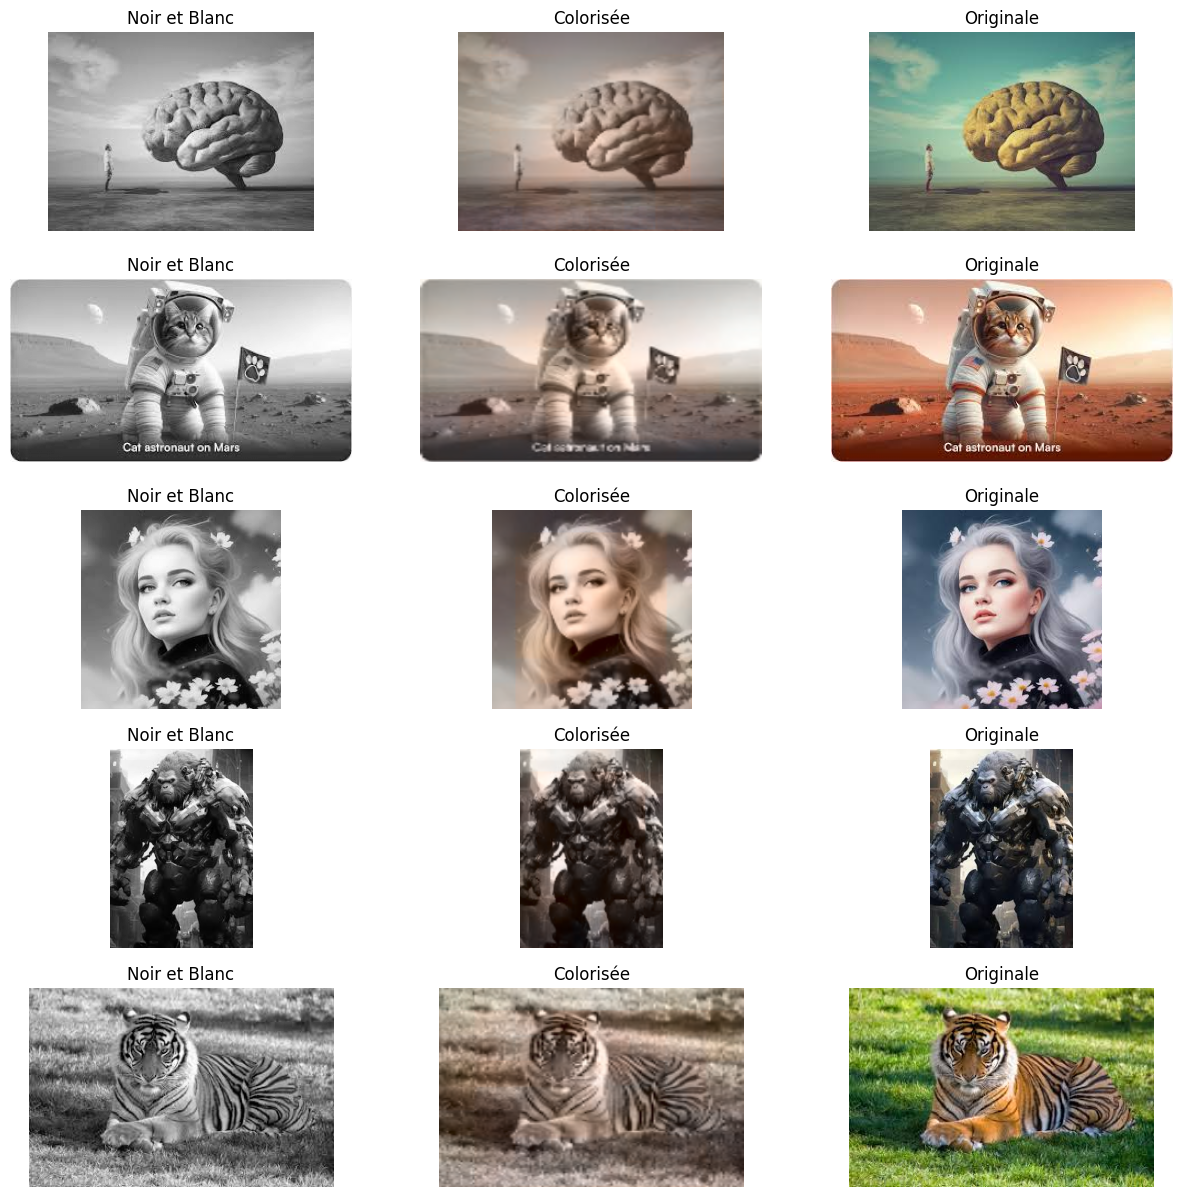

In [25]:
# Évaluation images d'internet
image_paths = ['internet/image1.jpeg', 'internet/image2.jpeg', 'internet/image3.jpeg', 'internet/image4.jpeg', 'internet/image5.jpeg']
tester_model_sur_images(image_paths)

## Question 16 – Le modèle est-il meilleur qu’auparavant sur les images tirées d’internet ? Si oui, pour- quoi ?

Oui, le modèle s'est amélioré sur les images provenant d'internet. Les couleurs sont plus précises, et les images colorisées sont plus fidèles aux originales.

Les translations aléatoires appliquées au jeu de données d'entraînement ont augmenté la diversité des images, ce qui a permis au modèle de mieux généraliser. Il est désormais capable de traiter des images externes avec plus de précision et moins d'artefacts.

**Conclusion** L'amélioration provient d'une meilleure capacité du modèle à généraliser, grâce à l'augmentation des données, ce qui le rend plus performant sur des images issues de sources variées, comme celles d'internet.



**16.1 Enregistrez votre modèle entraîné au format .keras avec model.save.**

In [26]:
model.save('mon_modele_colorisation_vincent.keras')



## Question 17 – (Bonus) Les colorisations effectuées par le modèle sont systématiquement plus ternes que les images réelles. L’article Colorful Image Colorization propose une explication de ce phénomène dans la section 2.1. Quelle est cette explication ? Donnez-en une illustration.


Dans la section 2.1 de l'article Colorful Image Colorization, il est expliqué que les colorisations produites par le modèle sont souvent plus ternes que les images réelles en raison de l'incertitude inhérente au processus de colorisation automatique. Le modèle est conçu pour minimiser l'erreur moyenne sur l'ensemble des données, ce qui le conduit à privilégier des solutions "moyennes" ou neutres. En d'autres termes, lorsqu'il est incertain de la couleur exacte d'un objet dans une image, le modèle tend à choisir des teintes plus atténuées et neutres afin de réduire le risque d'erreur, d'où des images plus ternes.

Illustration : Par exemple, si le modèle doit coloriser une photo d'un fruit dont la couleur pourrait être orange, rouge ou jaune, mais qu'il n'est pas certain, il pourrait opter pour une couleur intermédiaire, comme un beige ou un orange pâle, afin de minimiser l'erreur moyenne. Cela aboutit à une image moins vive que la réalité.

Cette tendance à produire des colorisations plus neutres résulte du compromis inhérent à l'optimisation du modèle pour un ensemble de données variées, et il peut être difficile d'y remédier sans recourir à des techniques plus sophistiquées ou à une supervision humaine.

